In [137]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import re

In [138]:
air_pollutions_df = pd.read_excel('../data/national_state_sector_2002_2024_caps_21feb2025_tons (1).xlsx', sheet_name='State')

In [139]:
air_pollutions_df.head(2);

In [140]:
air_pollutions_df[['Sector', 'Category', 'Subcategory']] = (
    air_pollutions_df['Sector']
    .str
    .split('-', n=2, expand=True)
);

In [141]:
air_pollutions_df.head();

In [142]:
air_pollutions_df['Category'].unique();

In [143]:
air_pollutions_df['State'].unique();

In [144]:
states_df = pd.read_csv('../data/states_boundries_updated.csv')
states_df.head()
df_states= states_df.rename(columns={'STUSPS' : 'State'})
#df_states.head()

In [145]:
merged_df = pd.merge(air_pollutions_df, df_states, on='State', how='inner' )
merged_df.shape;

In [146]:
airpollution_df = merged_df[['State', 'NAME', 'Pollutant', 'Sector','Category', 'Subcategory', 'emissions2002', 'emissions2003', 'emissions2004', 'emissions2005','emissions2006','emissions2007',
          'emissions2008', 'emissions2009','emissions2010','emissions2011','emissions2012','emissions2013','emissions2014','emissions2015','emissions2016',
          'emissions2017','emissions2018','emissions2019','emissions2020','emissions2021','emissions2022', 'emissions2023', 'emissions2024','INTPTLAT','INTPTLON']]

In [147]:
airpollution_df.head();

In [148]:
#df.columns = df.columns.str.replace('emissions', '')
airpollution_df.columns = airpollution_df.columns.str.replace('emissions', '')

In [149]:
new_df = airpollution_df.copy()
new_df.head();
new_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24379 entries, 0 to 24378
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        24379 non-null  object 
 1   NAME         24379 non-null  object 
 2   Pollutant    24379 non-null  object 
 3   Sector       24379 non-null  object 
 4   Category     23425 non-null  object 
 5   Subcategory  12232 non-null  object 
 6   2002         24375 non-null  float64
 7   2003         24375 non-null  float64
 8   2004         24375 non-null  float64
 9   2005         24375 non-null  float64
 10  2006         24375 non-null  float64
 11  2007         24375 non-null  float64
 12  2008         24375 non-null  float64
 13  2009         24375 non-null  float64
 14  2010         24375 non-null  float64
 15  2011         24375 non-null  float64
 16  2012         24375 non-null  float64
 17  2013         24375 non-null  float64
 18  2014         24375 non-null  float64
 19  2015

In [150]:
df_melted_new =(
    new_df
    .melt(id_vars = ['State','NAME','Pollutant','Sector','Category','Subcategory','INTPTLAT', 'INTPTLON'], var_name='Year', value_name='Value')
);

In [151]:
pollution_df= df_melted_new.copy()
pollution_df['Value'] = pollution_df['Value'].fillna(0)
pollution_df['Sector'] = pollution_df['Sector'].str.strip()
pollution_df['Total_emissions_mlns'] = pollution_df['Value']/1000000
print(pollution_df.info());
pollution_df.head();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560717 entries, 0 to 560716
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   State                 560717 non-null  object 
 1   NAME                  560717 non-null  object 
 2   Pollutant             560717 non-null  object 
 3   Sector                560717 non-null  object 
 4   Category              538775 non-null  object 
 5   Subcategory           281336 non-null  object 
 6   INTPTLAT              560717 non-null  float64
 7   INTPTLON              560717 non-null  float64
 8   Year                  560717 non-null  object 
 9   Value                 560717 non-null  float64
 10  Total_emissions_mlns  560717 non-null  float64
dtypes: float64(4), object(7)
memory usage: 47.1+ MB
None


### Data preparation

In [152]:
Biomass_df= pd.read_excel('../data/use_renew_source.xlsx', sheet_name= 'Biomass' )
biomass_melted = (
    Biomass_df
    .melt(
    id_vars='State',
    var_name='Year',
    value_name='Value'
))
date_filtered_biomass = biomass_melted[biomass_melted['Year'].between(2002, 2024)]
date_filtered_biomass.head()

,State,Year,Value
2184,AK,2002,3529
2185,AL,2002,163687
2186,AR,2002,72970
2187,AZ,2002,9306
2188,CA,2002,171500


In [153]:
geothermal_df= pd.read_excel('../data/use_renew_source.xlsx', sheet_name= 'Geothermal' )
geothermal_melted = (
    geothermal_df
    .melt(
    id_vars='State',
    var_name='Year',
    value_name='geo_Value'
))
date_filtered_geo = geothermal_melted[biomass_melted['Year'].between(2002, 2024)]
date_filtered_geo.head()

,State,Year,geo_Value
2184,AK,2002,86
2185,AL,2002,67
2186,AR,2002,228
2187,AZ,2002,294
2188,CA,2002,46830


In [154]:
hydro_df= pd.read_excel('../data/use_renew_source.xlsx', sheet_name= 'Hydropower' )
hydro_melted = (
    hydro_df
    .melt(
    id_vars='State',
    var_name='Year',
    value_name='hydro_Value'
))
date_filtered_hydro = hydro_melted[hydro_melted['Year'].between(2002, 2024)]
date_filtered_hydro.head()
print(date_filtered_hydro.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 2184 to 3327
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        1144 non-null   object
 1   Year         1144 non-null   object
 2   hydro_Value  1144 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 35.8+ KB
None


In [155]:
solar_df= pd.read_excel('../data/use_renew_source.xlsx', sheet_name= 'Solar energy' )
solar_melted = (
    solar_df
    .melt(
    id_vars='State',
    var_name='Year',
    value_name='solar_Value'
))
date_filtered_solar = solar_melted[solar_melted['Year'].between(2002, 2024)]
date_filtered_solar.head()

,State,Year,solar_Value
2184,AK,2002,0
2185,AL,2002,82
2186,AR,2002,500
2187,AZ,2002,2865
2188,CA,2002,17815


In [156]:
wind_df= pd.read_excel('../data/use_renew_source.xlsx', sheet_name= 'Wind energy' )
wind_melted = (
    wind_df
    .melt(
    id_vars='State',
    var_name='Year',
    value_name='wind_Value'
))
date_filtered_wind = wind_melted[wind_melted['Year'].between(2002, 2024)]
date_filtered_wind.head()

,State,Year,wind_Value
2184,AK,2002,0
2185,AL,2002,0
2186,AR,2002,0
2187,AZ,2002,0
2188,CA,2002,12975


In [157]:
# concat all renewable energy
solar = date_filtered_solar.rename(columns={'solar_Value':'value'})
wind = date_filtered_wind.rename(columns={'wind_Value':'value'})
geothermal = date_filtered_geo.rename(columns={'geo_Value':'value'})
hydro = date_filtered_hydro.rename(columns={'hydro_Value':'value'})
biomass = date_filtered_biomass.rename(columns={'Value':'value'})

In [158]:
solar['Energy'] = 'Solar'
wind['Energy'] = 'Wind'
geothermal['Energy'] = 'Geothermal'
hydro['Energy'] = 'Hydro'
biomass['Energy'] = 'Biomass'

In [159]:
solar.head()

,State,Year,value,Energy
2184,AK,2002,0,Solar
2185,AL,2002,82,Solar
2186,AR,2002,500,Solar
2187,AZ,2002,2865,Solar
2188,CA,2002,17815,Solar


In [160]:
# Combine all renewable energy sources into single dataframe
concat_df = pd.concat([solar, wind, geothermal, hydro, biomass])
renew_energy = concat_df[['State', 'Year', 'Energy', 'value']]
print(renew_energy.head())
print("*******************************")
print(renew_energy.info())

     State  Year Energy  value
2184    AK  2002  Solar      0
2185    AL  2002  Solar     82
2186    AR  2002  Solar    500
2187    AZ  2002  Solar   2865
2188    CA  2002  Solar  17815
*******************************
<class 'pandas.core.frame.DataFrame'>
Index: 5720 entries, 2184 to 3327
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   5720 non-null   object
 1   Year    5720 non-null   object
 2   Energy  5720 non-null   object
 3   value   5720 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 223.4+ KB
None


In [161]:
states = df_states[['State', 'NAME', 'INTPTLAT', 'INTPTLON']]

In [162]:
renew_energy_poly = pd.merge(renew_energy, states, on='State', how='inner' )
renew_energy_poly= renew_energy_poly[['State', 'NAME', 'Year', 'Energy', 'value', 'INTPTLAT', 'INTPTLON']]
renew_energy_poly.head()

,State,NAME,Year,Energy,value,INTPTLAT,INTPTLON
0,AK,Alaska,2002,Solar,0,63.347356,-152.839733
1,AL,Alabama,2002,Solar,82,32.739579,-86.843447
2,AR,Arkansas,2002,Solar,500,34.895526,-92.444626
3,AZ,Arizona,2002,Solar,2865,34.203936,-111.606345
4,CA,California,2002,Solar,17815,37.155177,-119.543418


In [163]:
renew_energy_poly.to_csv(r'C:\Users\jinor\OneDrive\Documents\NSS\python\Air-Pollution-Analysis\data\renewable_energy.csv', index=False)

In [164]:
# Total renewable energy by consumption
energy_totals = (
    renew_energy_poly
    .groupby('Energy')['value']
    .sum()
    .reset_index(name='Total value')
    .sort_values(by='Total value', ascending=False)
)
energy_totals.head()

,Energy,Total value
0,Biomass,93894221
2,Hydro,20342049
4,Wind,12832763
3,Solar,5338931
1,Geothermal,2332923


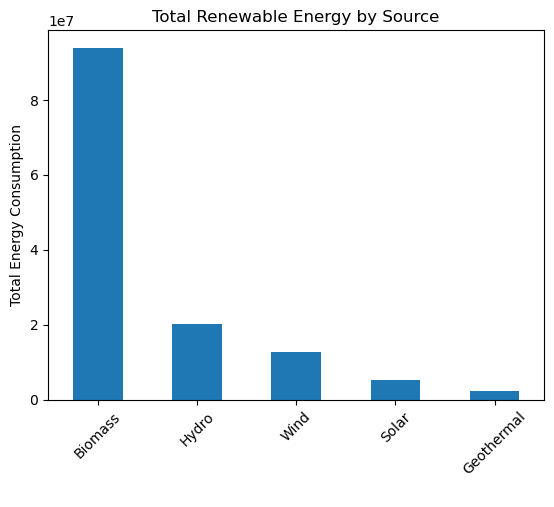

In [165]:
energy_totals.plot(kind='bar', x='Energy', y='Total value', legend=False)
plt.xlabel(' ')
plt.ylabel('Total Energy Consumption')
plt.title('Total Renewable Energy by Source')
plt.xticks(rotation=45)
plt.show()

In [166]:
# Annual Renewable energy consumption
yearly_consumption = (
    renew_energy_poly
    .groupby(['Year', 'Energy'])['value']
    .sum()
    .reset_index(name='tot_value')
)

yearly_consumption_pivot = (yearly_consumption
                          .pivot(index='Year', columns='Energy', values='tot_value')
                         )
yearly_consumption_pivot.head()

Energy,Biomass,Geothermal,Hydro,Solar,Wind
Year,,,,,
2002,2700621,73190,901889,55127,35330
2003,2806476,76617,941054,53566,38170
2004,3008076,80339,915837,53026,48258
2005,3112385,83927,922337,51937,60769
2006,3262128,86400,986909,54095,90722


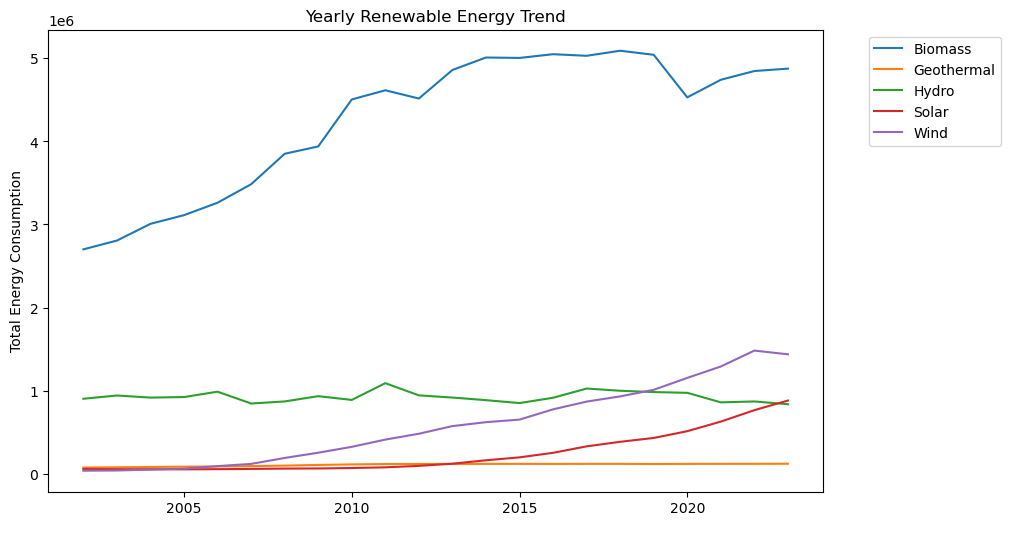

In [167]:
#Annual Renewable Energy consumption by source
yearly_consumption_pivot.plot(figsize=(10,6))
plt.title('Yearly Renewable Energy Trend')
plt.ylabel('Total Energy Consumption')
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [168]:
pollution_group= pollution_df.groupby(['State', 'Year'])['Value'].sum().reset_index(name='emission_value')

# Converting total emissions fron tons to million tons
pollution_group['emission_value_mlns'] = pollution_group['emission_value']/1000000

# Creating structured dataset
pollution_by_year = pollution_group[['State', 'Year', 'emission_value_mlns']]
print(pollution_by_year.head())

#Converting year column object to int
pollution_by_year['Year'] = pollution_by_year['Year'].astype(int)

# finding total renewable energy by state and year
energy_df = (renew_energy
             .groupby(['State', 'Year'])['value']
             .sum()
             .reset_index(name='energy_value')
            )
energy_by_year = energy_df[['State','Year', 'energy_value']]

# Merging pollution and energy datasets
emission_energy= pd.merge(pollution_by_year, energy_by_year, on=['State', 'Year'], how='inner' )
print(emission_energy.info())
emission_energy.head()

  State  Year  emission_value_mlns
0    AK  2002             2.143011
1    AK  2003             1.410754
2    AK  2004             4.918640
3    AK  2005             3.510408
4    AK  2006             1.035269
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                1122 non-null   object 
 1   Year                 1122 non-null   int64  
 2   emission_value_mlns  1122 non-null   float64
 3   energy_value         1122 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 35.2+ KB
None


C:\Users\jinor\AppData\Local\Temp\ipykernel_37080\2684977759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pollution_by_year['Year'] = pollution_by_year['Year'].astype(int)


,State,Year,emission_value_mlns,energy_value
0,AK,2002,2.143011,8526
1,AK,2003,1.410754,8974
2,AK,2004,4.918640,8964
3,AK,2005,3.510408,6220
4,AK,2006,1.035269,5330


In [169]:
emission_energy.to_csv(r'C:\Users\jinor\OneDrive\Documents\NSS\python\Air-Pollution-Analysis\data\emission_energy.csv', index=False)

In [170]:
yearly_emission_energy_value = (
    emission_energy
    .groupby('Year')[['emission_value_mlns', 'energy_value']]
    .sum()
    .reset_index()
)
yearly_emission_energy_value.head()


,Year,emission_value_mlns,energy_value
0,2002,182.118544,3766157
1,2003,184.499447,3915883
2,2004,170.635182,4105536
3,2005,166.968134,4231355
4,2006,156.636497,4480254


In [171]:
# Filter dataset to include only Fuel Combustion sector data
Yearly_fuel_emissions = pollution_df[pollution_df['Sector'] == 'Fuel Comb']
Yearly_fuel_emissions.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
9,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Biomass,32.739579,-86.843447,2002,0.643667,6.436670e-07
10,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Coal,32.739579,-86.843447,2002,0.425113,4.251130e-07
11,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Natural Gas,32.739579,-86.843447,2002,0.835048,8.350484e-07
12,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Oil,32.739579,-86.843447,2002,18.680693,1.868069e-05
13,AL,Alabama,Black Carbon,Fuel Comb,Comm/Institutional,Other,32.739579,-86.843447,2002,0.139218,1.392184e-07


In [172]:
Yearly_fuel_emissions_df = (Yearly_fuel_emissions
                            .groupby('Year')['Total_emissions_mlns']
                            .sum()
                            .reset_index(name='emission_total')
                           )

In [173]:
# Creating an Emission Index for the Fuel Combustion sector
Yearly_fuel_emissions_df['emission_total_index'] = ((Yearly_fuel_emissions_df['emission_total'] / Yearly_fuel_emissions_df['emission_total']
                                                     .iloc[0])*100
                                                   )

In [174]:
Yearly_fuel_emissions_df['Year']= Yearly_fuel_emissions_df['Year'].astype(int)
Yearly_fuel_emissions_df.head()

,Year,emission_total,emission_total_index
0,2002,27.612774,100.000000
1,2003,27.920516,101.114493
2,2004,26.639661,96.475862
3,2005,26.635322,96.460145
4,2006,23.002259,83.302964


In [175]:
# Filtering Solar, Wind, and Hydro energy data only
solar_wind_hydro_df = renew_energy_poly[renew_energy_poly['Energy'].isin(['Solar', 'Wind', 'Hydro'])]


In [176]:

solar_wind_hydro = (
    solar_wind_hydro_df
    .groupby('Year')['value']
    .sum()
    .reset_index(name='energy_value')
)

In [177]:
# Create an Energy Index for Solar, Wind, and Hydro
solar_wind_hydro['energy_index'] = (solar_wind_hydro['energy_value'] / solar_wind_hydro['energy_value'].iloc[0]) *100
solar_wind_hydro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          22 non-null     int64  
 1   energy_value  22 non-null     int64  
 2   energy_index  22 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 660.0 bytes


In [178]:
emission_energy_merged = pd.merge(Yearly_fuel_emissions_df, solar_wind_hydro, on='Year', how='inner')
emission_energy_merged.head()

,Year,emission_total,emission_total_index,energy_value,energy_index
0,2002,27.612774,100.000000,992346,100.000000
1,2003,27.920516,101.114493,1032790,104.075595
2,2004,26.639661,96.475862,1017121,102.496609
3,2005,26.635322,96.460145,1035043,104.302632
4,2006,23.002259,83.302964,1131726,114.045504


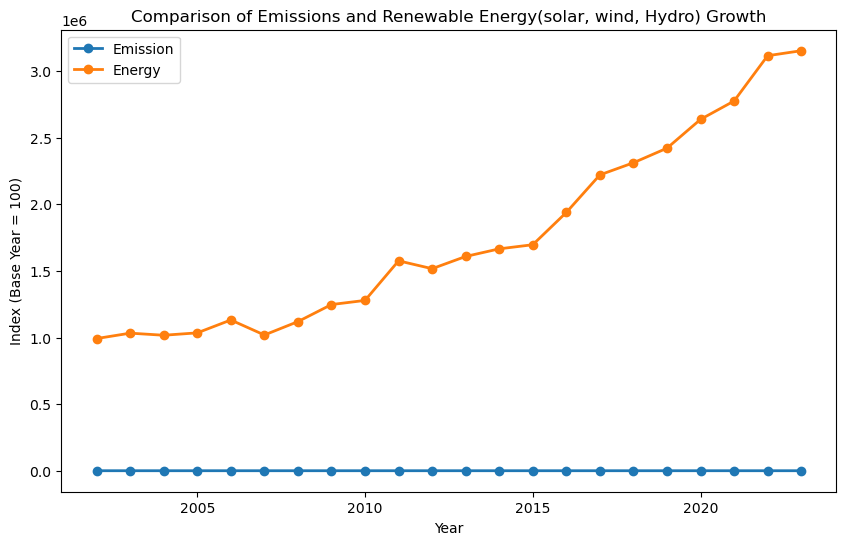

In [179]:
plt.figure(figsize=(10,6))

plt.plot(emission_energy_merged['Year'], emission_energy_merged['emission_total'],marker='o', linewidth=2,label='Emission')
plt.plot(emission_energy_merged['Year'], emission_energy_merged['energy_value'],marker='o', linewidth=2,label='Energy')

plt.xlabel("Year")
plt.ylabel("Index (Base Year = 100)")
plt.title("Comparison of Emissions and Renewable Energy(solar, wind, Hydro) Growth")
plt.legend()
plt.show()

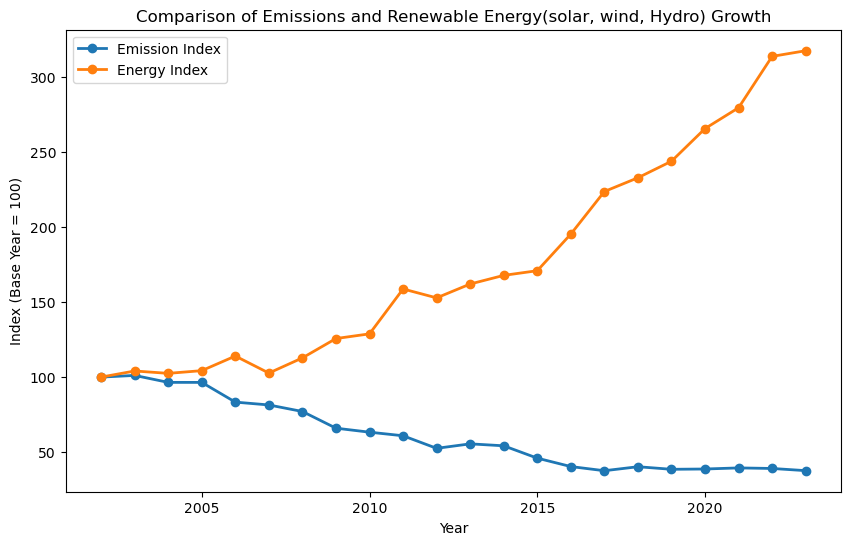

In [180]:
plt.figure(figsize=(10,6))

plt.plot(emission_energy_merged['Year'], emission_energy_merged['emission_total_index'],marker='o', linewidth=2,label='Emission Index')
plt.plot(emission_energy_merged['Year'], emission_energy_merged['energy_index'],marker='o', linewidth=2,label='Energy Index')

plt.xlabel("Year")
plt.ylabel("Index (Base Year = 100)")
plt.title("Comparison of Emissions and Renewable Energy(solar, wind, Hydro) Growth")
plt.legend()
plt.show()

In [181]:
Air_pollution_df = pollution_group.copy()
Air_pollution = (
    Air_pollution_df
    .groupby('Year')['emission_value_mlns']
    .sum()
    .reset_index(name='Total Emissions')
    .sort_values(by='Year', ascending=True)
)
Air_pollution['Year'] = Air_pollution['Year'].astype(int)

In [182]:
emission_df = Air_pollution.set_index('Year')

# getting the total fuel combustion for the earliest year
emission_2002 = emission_df.loc[2002, 'Total Emissions']

# getting the total fuel combustion for the latest year
emission_2024 = emission_df.loc[2024, 'Total Emissions']

# Finding percentage change in emission
emission_percentage_change = ((emission_2024 - emission_2002) / emission_2002) * 100
print(f'Emission change percentage from 2002 to 2024: {emission_percentage_change:.2f}%')

Emission change percentage from 2002 to 2024: -48.71%


### Emission change percentage from 2002 to 2024: -48.71%

In [183]:
energy_df = emission_energy_merged.set_index('Year')

# getting the total Energy consumption for the earliest year
energy_2002 = energy_df.loc[2002, 'energy_value']

# getting the total Energy consumption for the latest year
energy_2024 = energy_df.loc[2023, 'energy_value']

# Finding percentage growth in Energy
energy_percentage_change = ((energy_2024 - energy_2002) / energy_2002) * 100
print(f'Energy growth percentage from 2002 to 2024: {energy_percentage_change:.2f}%')

Energy growth percentage from 2002 to 2024: 217.75%


### Energy growth percentage from 2002 to 2024: 217.75%

In [191]:
emission_energy_poly = pd.merge(emission_energy, states, on='State', how='inner' )
emission_energy_poly.head()

,State,Year,emission_value_mlns,energy_value,NAME,INTPTLAT,INTPTLON
0,AK,2002,2.143011,8526,Alaska,63.347356,-152.839733
1,AK,2003,1.410754,8974,Alaska,63.347356,-152.839733
2,AK,2004,4.918640,8964,Alaska,63.347356,-152.839733
3,AK,2005,3.510408,6220,Alaska,63.347356,-152.839733
4,AK,2006,1.035269,5330,Alaska,63.347356,-152.839733


### Data preparation

In [192]:
motor_vehicle_df = pd.read_csv('../data/Motor_Vehicle_Registrations__1900_-_2023__MV-1_.csv')
motor_vehicle = motor_vehicle_df.rename(columns={'State': 'NAME'})
motor_vehicle.head()

,Year,NAME,Category,Type,Vehicles
0,1900,Alabama,Auto,NaN,40.0
1,1900,Alabama,Bus,NaN,0.0
2,1900,Alabama,Truck,NaN,0.0
3,1900,Alabama,Motorcycle,NaN,0.0
4,1900,Alaska,Auto,NaN,0.0


In [193]:
# Filtering motor vehicle data from 2002 to 2025 only
Years_filtered = motor_vehicle[motor_vehicle['Year'].between(2002, 2025)]
Years_filtered.head()

,Year,NAME,Category,Type,Vehicles
21232,2002,Alabama,Auto,Private,1785645.0
21233,2002,Alabama,Auto,Public,16033.0
21234,2002,Alabama,Bus,Private,2523.0
21235,2002,Alabama,Bus,Public,6371.0
21236,2002,Alabama,Truck,Private,2590390.0


In [194]:
merged_state_vehicle = pd.merge(Years_filtered, df_states[['State', 'NAME']], on='NAME', how='left')
merged_state_vehicle.head()

,Year,NAME,Category,Type,Vehicles,State
0,2002,Alabama,Auto,Private,1785645.0,AL
1,2002,Alabama,Auto,Public,16033.0,AL
2,2002,Alabama,Bus,Private,2523.0,AL
3,2002,Alabama,Bus,Public,6371.0,AL
4,2002,Alabama,Truck,Private,2590390.0,AL


In [195]:
# Merged Vehicle count and Emission value by state and year
merged_vehicle_cleaned = merged_state_vehicle.copy()

# Filtering only necessary columns
merged_vehicle_cleaned = merged_vehicle_cleaned[['Year', 'State', 'Vehicles']]

# Finding total number of vehicles by State and Year
vehicle_by_year = (
    merged_vehicle_cleaned
    .groupby(['State', 'Year'])['Vehicles']
    .sum()
    .reset_index(name='Total_vehicles')
)
emission_vehicle_df = pd.merge(pollution_by_year, vehicle_by_year, on=['State', 'Year'], how='inner' )
emission_vehicle_df.head()

,State,Year,emission_value_mlns,Total_vehicles
0,AK,2002,2.143011,638588.0
1,AK,2003,1.410754,656398.0
2,AK,2004,4.918640,681115.0
3,AK,2005,3.510408,694996.0
4,AK,2006,1.035269,699216.0


In [196]:
merged_state_vehicle.head()
# Total vehicle count by year and category
vehicle_count = (merged_state_vehicle
                 .groupby(['Year', 'Category'])['Vehicles']
                 .sum()
                 .reset_index(name='total_vehicle_count')
                 .sort_values(by='total_vehicle_count', ascending=False)
                )

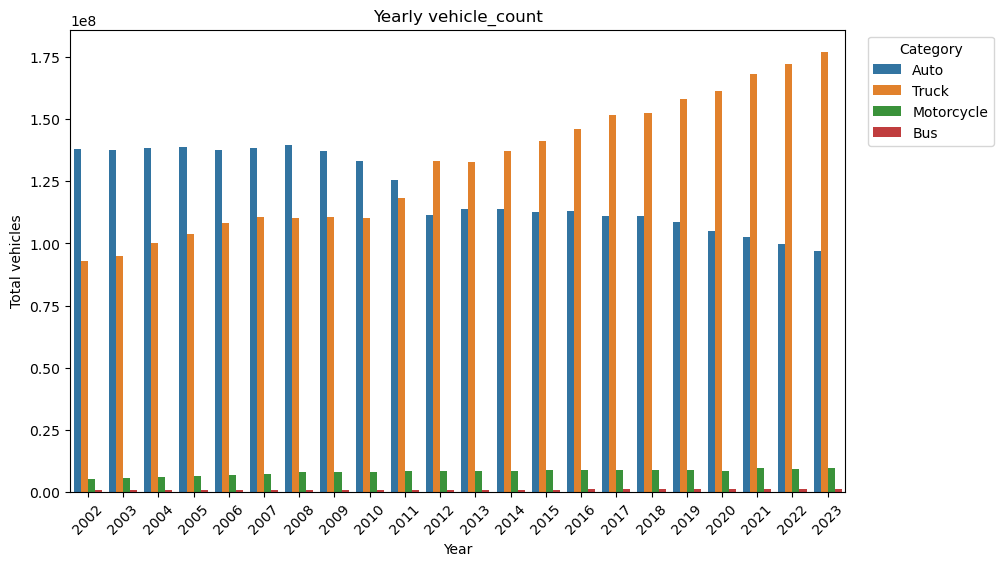

In [197]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=vehicle_count, x='Year', y='total_vehicle_count', hue='Category')

plt.title('Yearly vehicle_count')
plt.xlabel('Year')
plt.ylabel('Total vehicles')
plt.xticks(rotation=45)
plt.legend(title='Category',bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

In [198]:
emission_vehicle_df.head()

,State,Year,emission_value_mlns,Total_vehicles
0,AK,2002,2.143011,638588.0
1,AK,2003,1.410754,656398.0
2,AK,2004,4.918640,681115.0
3,AK,2005,3.510408,694996.0
4,AK,2006,1.035269,699216.0


In [199]:
Yearly_emission_vehicle = (
    emission_vehicle_df
    .groupby('Year')[['emission_value_mlns', 'Total_vehicles']]
    .sum()
    .reset_index()
)
Yearly_emission_vehicle.head()

,Year,emission_value_mlns,Total_vehicles
0,2002,184.458158,236758622.0
1,2003,186.867496,238894520.0
2,2004,173.027520,245305625.0
3,2005,169.393673,249703259.0
4,2006,158.982713,253381890.0


In [200]:
Yearly_emission_vehicle['emission_ind'] = (Yearly_emission_vehicle['emission_value_mlns'] / Yearly_emission_vehicle['emission_value_mlns'].iloc[0]) *100
Yearly_emission_vehicle['vehicles_ind'] = (Yearly_emission_vehicle['Total_vehicles'] / Yearly_emission_vehicle['Total_vehicles'].iloc[0]) *100

In [201]:
Yearly_emission_vehicle.head()

,Year,emission_value_mlns,Total_vehicles,emission_ind,vehicles_ind
0,2002,184.458158,236758622.0,100.000000,100.000000
1,2003,186.867496,238894520.0,101.306171,100.902142
2,2004,173.027520,245305625.0,93.803127,103.610007
3,2005,169.393673,249703259.0,91.833115,105.467441
4,2006,158.982713,253381890.0,86.189039,107.021188


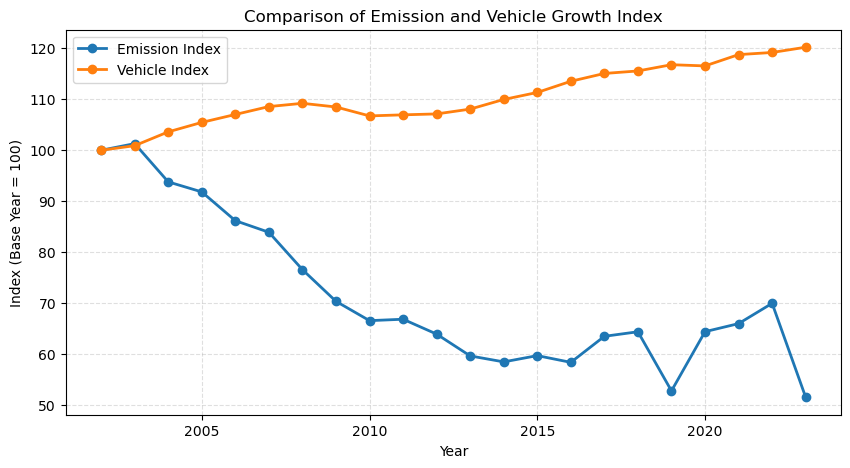

In [202]:
plt.figure(figsize=(10,5))

plt.plot(Yearly_emission_vehicle['Year'], Yearly_emission_vehicle['emission_ind'], marker='o', linewidth=2, label='Emission Index')
plt.plot(Yearly_emission_vehicle['Year'], Yearly_emission_vehicle['vehicles_ind'], marker='o', linewidth=2, label='Vehicle Index')

plt.xlabel("Year")
plt.ylabel("Index (Base Year = 100)")
plt.title("Comparison of Emission and Vehicle Growth Index")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [203]:
pollution_df.head()

,State,NAME,Pollutant,Sector,Category,Subcategory,INTPTLAT,INTPTLON,Year,Value,Total_emissions_mlns
0,AL,Alabama,Black Carbon,Agriculture,Crops & Livestock Dust,None,32.739579,-86.843447,2002,186.911689,1.869117e-04
1,AL,Alabama,Black Carbon,Fuel & Services,Gasoline Terminals,None,32.739579,-86.843447,2002,0.007700,7.700000e-09
2,AL,Alabama,Black Carbon,Fuel & Services,Commercial Cooking,None,32.739579,-86.843447,2002,38.416900,3.841690e-05
3,AL,Alabama,Black Carbon,Dust,Construction Dust,None,32.739579,-86.843447,2002,0.000000,0.000000e+00
4,AL,Alabama,Black Carbon,Dust,Paved Road Dust,None,32.739579,-86.843447,2002,49.204652,4.920465e-05


In [204]:
transport_df = pollution_df[pollution_df['Sector'] == 'Transportation']
transport_emission_year = transport_df.groupby('Year')['Total_emissions_mlns'].sum().reset_index(name='total_emission')
transport_emission_year['transport_emi_index'] = (transport_emission_year['total_emission'] / transport_emission_year['total_emission'].iloc[0])*100
transport_emission_year['Year'] = transport_emission_year['Year'].astype(int)

In [205]:
merger_emission_vehicle = pd.merge(Yearly_emission_vehicle, transport_emission_year, on='Year', how='inner')
merger_emission_vehicle.head()

,Year,emission_value_mlns,Total_vehicles,emission_ind,vehicles_ind,total_emission,transport_emi_index
0,2002,184.458158,236758622.0,100.000000,100.000000,107.950030,100.000000
1,2003,186.867496,238894520.0,101.306171,100.902142,102.460476,94.914728
2,2004,173.027520,245305625.0,93.803127,103.610007,94.606646,87.639296
3,2005,169.393673,249703259.0,91.833115,105.467441,88.472478,81.956882
4,2006,158.982713,253381890.0,86.189039,107.021188,82.391145,76.323411


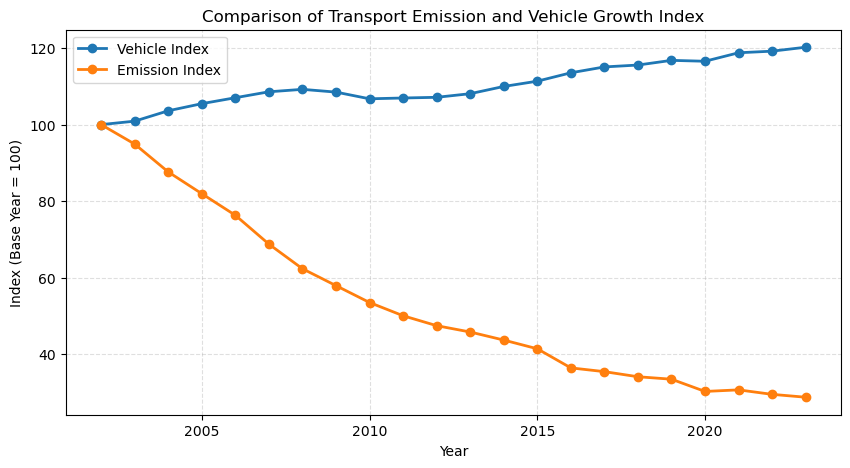

In [206]:
plt.figure(figsize=(10,5))

plt.plot(merger_emission_vehicle['Year'], merger_emission_vehicle['vehicles_ind'], marker='o', linewidth=2, label='Vehicle Index')
plt.plot(merger_emission_vehicle['Year'], merger_emission_vehicle['transport_emi_index'], marker='o', linewidth=2, label='Emission Index')

plt.xlabel("Year")
plt.ylabel("Index (Base Year = 100)")
plt.title("Comparison of Transport Emission and Vehicle Growth Index")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [214]:
Data ={
    'Year': [1970,1975,1980,1985,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,
             2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024],
    'VOC_emissions': [34659,30765,31107,27403,24108,23577,23066,22730,22570,22042,20871,19530,18781,18270,17512,17111,17333,18175,16972,16858,16470,
                      16622,15389,14156,13596,14604,14573,13287,13365,14148,14113,15716,16156,12718,16628,17010,17613,12848,12783],
    'CO_emissions': [204042,188398,185408,176845,154188,147128,140895,135902,133558,126778,128858,117910,115380,114541,114467,106262,99416,99825,
                     90315,86663,81572,78629,69976,65269,60247,62141,59003,55020,53733,56296,54623,61422,62783,48836,62437,60639,65698,45461,44936],
    'NOX_emissions':[26882,26378,27080,25757,25527,25180,25261,25356,25350,24955,24787,24705,24348,22845,22598,21549,25254,24611,22857,21865,20273,
                     18996,17910,15597,15340,14634,13740,12886,12160,11114,10037,9505,9109,8602,7816,7801,7616,7132,6940],
    'SO2_emissions':[31218,28044,25926,23307,23077,22375,22082,21773,21346,18619,18385,18840,18944,17545,16347,15932,14845,15373,14631,14563,
                     12441,11597,10178,8004,6938,6428,5117,4850,4598,3502,2696,2508,2411,1965,1845,2048,2028,1716,1675],
    'PM2.5': [0,0,0,0,7560,7320,7198,7149,7542,6929,6724,6256,6261,7211,7288,6996,5000,5439,5307,5456,5231,5290,4992,4723,4616,4943,4729,4394,4386,4667,
             4872,5524,5606,4440,5821,6978,7519,5095,5090],
    'PM10':[13022,7555,7013,41323,27753,27345,27098,27364,28608,25820,22857,22909,22893,23383,23747,23708,16670,17212,16896,17586,16783,17234,
            16735,16259,16239,16692,16836,15695,15718,16146,16734,17672,17130,15422,16779,19610,20549,16424,16419]
    
}

In [215]:
hist_emissions_data =pd.DataFrame(Data)

In [216]:
hist_emissions_data.head()

,Year,VOC_emissions,CO_emissions,NOX_emissions,SO2_emissions,PM2.5,PM10
0,1970,34659,204042,26882,31218,0,13022
1,1975,30765,188398,26378,28044,0,7555
2,1980,31107,185408,27080,25926,0,7013
3,1985,27403,176845,25757,23307,0,41323
4,1990,24108,154188,25527,23077,7560,27753


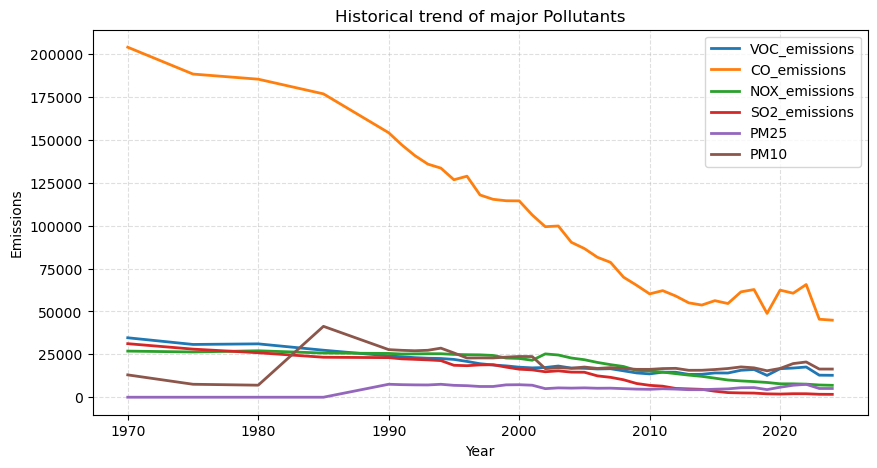

In [210]:
plt.figure(figsize=(10,5))

plt.plot(hist_emissions_data['Year'], hist_emissions_data['VOC_emissions'],  linewidth=2, label='VOC_emissions')
plt.plot(hist_emissions_data['Year'], hist_emissions_data['CO_emissions'],  linewidth=2, label='CO_emissions')
plt.plot(hist_emissions_data['Year'], hist_emissions_data['NOX_emissions'],  linewidth=2, label='NOX_emissions')
plt.plot(hist_emissions_data['Year'], hist_emissions_data['SO2_emissions'],  linewidth=2, label='SO2_emissions')
plt.plot(hist_emissions_data['Year'], hist_emissions_data['PM25'], linewidth=2, label='PM25')
plt.plot(hist_emissions_data['Year'], hist_emissions_data['PM10'], linewidth=2, label='PM10')

plt.xlabel("Year")
plt.ylabel("Emissions")
plt.title("Historical trend of major Pollutants")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

In [220]:
# df_melted_new =(
#     new_df
#     .melt(id_vars = ['State','NAME','Pollutant','Sector','Category','Subcategory','INTPTLAT', 'INTPTLON'], var_name='Year', value_name='Value')
# )

df_melted = (
    hist_emissions_data
    .melt(id_vars=['Year'], var_name = 'Pollutant', value_name='Emissions'))

In [222]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       234 non-null    int64 
 1   Pollutant  234 non-null    object
 2   Emissions  234 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.6+ KB


In [224]:
pollution_by_year = df_melted.groupby('Year')['Emissions'].sum()

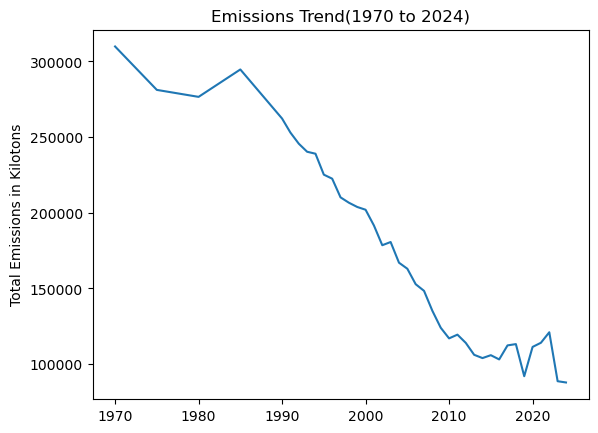

In [229]:
pollution_by_year.plot(kind='line')
plt.xlabel('')
plt.ylabel('Total Emissions in Kilotons')
plt.title('Emissions Trend(1970 to 2024)')
plt.show()